In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Darjeeling.csv')

In [ ]:
df.columns

Index(['Date', 'Pressure(mb)', 'Dew Point(?)', 'Humidity(%)', 'Temperature(?)',
       'Min Temp(?)', 'Max Temp(?)', 'Wind(mph)', 'Precipitation(%)',
       'Rain(in)', 'landslide', 'count'],
      dtype='object')

In [ ]:
df = df.fillna(0)

In [ ]:
df = df.set_index('Date')

In [ ]:
df.head()

,Pressure(mb),Dew Point(?),Humidity(%),Temperature(?),Min Temp(?),Max Temp(?),Wind(mph),Precipitation(%),Rain(in),landslide,count
Date,,,,,,,,,,,
31-03-2020,1013,55,34,86,63,89,6,0,0.03,0.0,0.0
01-04-2020,1011,48,27,85,65,88,7,2,0.03,0.0,0.0
02-04-2020,1010,52,32,85,62,88,5,2,0.06,0.0,0.0
03-04-2020,1012,49,26,88,63,90,5,0,0.00,0.0,0.0
04-04-2020,1012,48,28,85,63,88,6,1,0.01,0.0,0.0


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# # feature_range=(0,3)
# scaler=MinMaxScaler()
# df1=scaler.fit_transform((df.iloc[:,[0,1,2,7,8]]))
# df_2 = pd.DataFrame(df1)
# df_final = pd.concat([df.iloc[:,[-2]],df_2],axis=1)

In [ ]:
X = df.iloc[:,[0,1,2,7,8]]
y = df.iloc[: ,-2]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# feature_range=(0,3)
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
x_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
x_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
num_classes = len(np.unique(y_train))

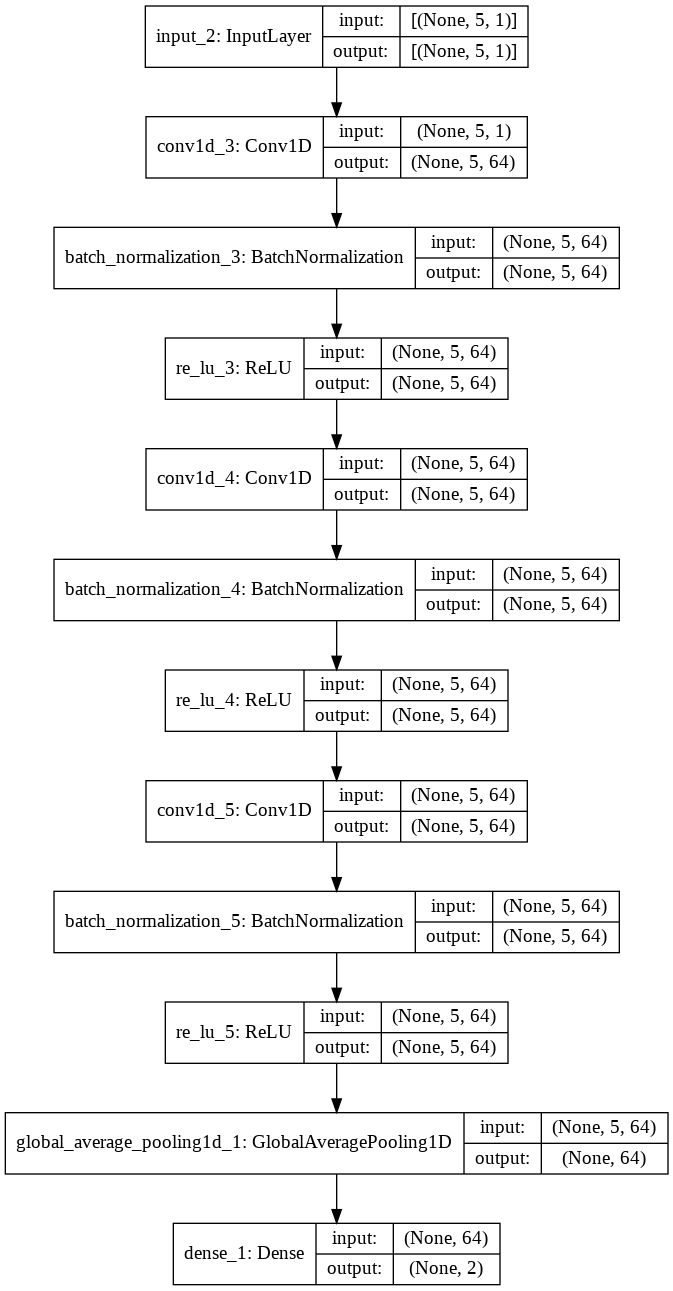

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
9/9 [==============================] - 1s 34ms/step - loss: 0.0463 - sparse_categorical_accuracy: 0.9888 - val_loss: 0.8109 - val_sparse_categorical_accuracy: 0.8060
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0580 - sparse_categorical_accuracy: 0.9739 - val_loss: 0.5271 - val_sparse_categorical_accuracy: 0.9104
Epoch 3/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0441 - sparse_categorical_accuracy: 0.9888 - val_loss: 0.6607 - val_sparse_categorical_accuracy: 0.9254
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0315 - sparse_categorical_accuracy: 0.9888 - val_loss: 0.7163 - val_sparse_categorical_accuracy: 0.8806
Epoch 5/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0259 - sparse_categorical_accuracy: 0.9888 - val_loss: 0.6944 - val_sparse_categorical_accuracy: 0.8358
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0220 - sparse_categorical_accuracy: 0.992

In [ ]:
#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

6/6 [==============================] - 0s 4ms/step - loss: 1.0979 - sparse_categorical_accuracy: 0.9091
Test accuracy 0.9090909361839294
Test loss 1.0979102849960327


In [ ]:
test_loss, test_acc = model.evaluate(x_train, y_train)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

11/11 [==============================] - 0s 2ms/step - loss: 0.2026 - sparse_categorical_accuracy: 0.9821
Test accuracy 0.9820895791053772
Test loss 0.20262664556503296


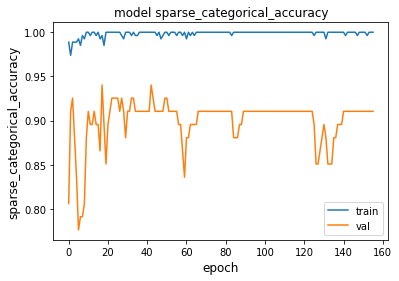

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()